In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks')

In [6]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import keras_utils
from keras_utils import reset_tf_session

1.15.0
2.2.5


In [8]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

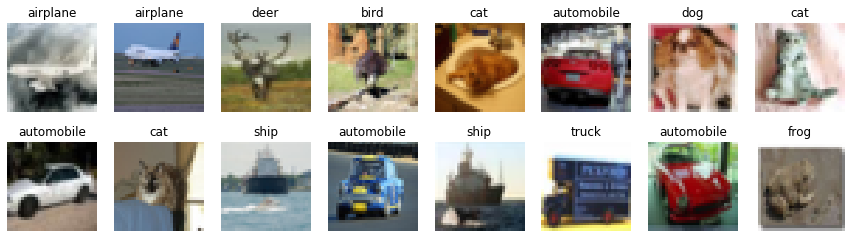

In [10]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [0]:
#normalize inputs
x_train2=(x_train/255)-0.5
x_test2=(x_test/255)-0.5
#---------------------------------------------------------
y_train2=keras.utils.to_categorical(y_train,num_classes=NUM_CLASSES)
y_test2=keras.utils.to_categorical(y_test,num_classes=NUM_CLASSES)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [0]:
#We are going to create a model which takes (None,32,32,3) input and predicts (None,10) output with probabilities
#for all classes.

In [0]:
def make_model():
    model = Sequential()
    model.add(Conv2D(16,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32,(3,3),padding='same',))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32,(3,3),padding='same',))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64,(3,3),padding='same',))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    
    return model

In [16]:
s = reset_tf_session()  # clear default graph
model = make_model()
model.summary()









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0       

In [17]:
INIT_LR = 5e-3 
BATCH_SIZE = 32
EPOCHS = 10

s = reset_tf_session() 
model = make_model()  

model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.adamax(lr=INIT_LR),
    metrics=['accuracy'] 
)

def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch


class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [0]:
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

In [19]:
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory(), 
               keras_utils.TqdmProgressCallback(),
               keras_utils.ModelSaveCallback(model_filename)],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=0,
    initial_epoch=last_finished_epoch or 0
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Learning rate: 0.005

Epoch 1/10



Model saved in cifar.000.hdf5
Learning rate: 0.0045

Epoch 2/10



Model saved in cifar.001.hdf5
Learning rate: 0.00405

Epoch 3/10



Model saved in cifar.002.hdf5
Learning rate: 0.003645

Epoch 4/10



Model saved in cifar.003.hdf5
Learning rate: 0.0032805

Epoch 5/10



Model saved in cifar.004.hdf5
Learning rate: 0.00295245

Epoch 6/10



Model saved in cifar.005.hdf5
Learning rate: 0.002657205

Epoch 7/10



Model saved in cifar.006.hdf5
Learning rate: 0.0023914846

Epoch 8/10



Model saved in cifar.007.hdf5
Learning rate: 0.002152336

Epoch 9/10



Model saved in cifar.008.hdf5
Learning rate: 0.0019371024

Epoch 10/10



Model saved in cifar.009.hdf5


In [0]:

model.save_weights("weights.h5")

In [0]:
model.load_weights("weights.h5")

In [0]:
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

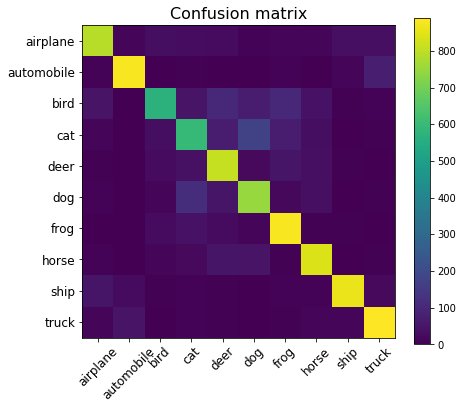

Test accuracy: 0.788


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

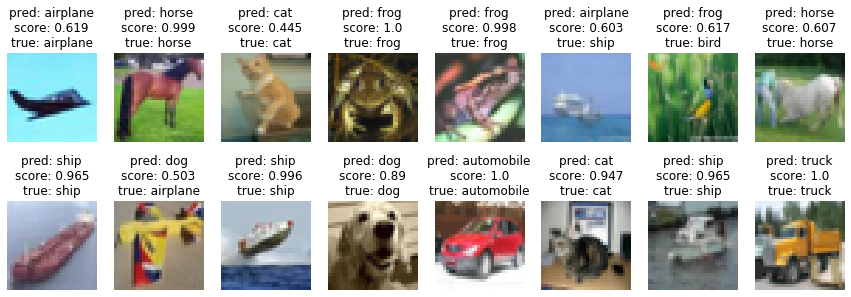

In [24]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [0]:
s = reset_tf_session() 
K.set_learning_phase(0) 
model = make_model()
model.load_weights("weights.h5") 

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)       